# Dryers Data Review Using Python

This is example of using Python, Pandas, Matplotlib, and Seaborn to analyze dehydration units data

First we need to import required libraries

In [1]:
# import core libraries for calculation
import pandas as pd
import numpy as np

In [2]:
# import visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Then we read the dryers data from Excel template. We skip 2 rows because they were tags and units. We don't need those

In [3]:
# load data drom data folder
filename = './data/Op_Data.xlsx'
df= pd.read_excel(filename, skiprows=2, parse_dates=True)

Check if data loaded correctly

In [4]:
df.head()

,Datetime,"Inlet Pressure, Bed A","Feed Flow, Bed A","Inlet Temperature, Bed A","Outlet Temperature, Bed A","Stage, Bed A","Adsorption Time, Bed A","Top Moisture analyser, Bed A","Bottom Moisture analyser, Bed A","Pressure Drop, Bed A",...,Stage Bed D,"Adsorption Time, Bed D","Top Moisture analyser, Bed D","Bottom Moisture analyser, Bed D","Pressure Drop, Bed D",Moisture analyser (common),Temperature common outlet,Regeneration gas flow rate,Regeneration gas temperature,Regeneration pressure
0,2023-01-01 00:00:00,49.458401,6628.724121,17.774931,NaN,NaN,NaN,-0.488281,0.035611,0.696016,...,NaN,NaN,-0.114801,0.072684,0.765513,0.003223,244.678711,448.099609,321.044830,42.102863
1,2023-01-01 00:05:00,49.480274,6635.755371,17.813131,NaN,NaN,NaN,-0.488281,0.035611,0.694668,...,NaN,NaN,-0.114801,0.072684,0.764541,0.003223,257.161133,450.386719,320.498444,42.165691
2,2023-01-01 00:10:00,49.463089,6639.974121,17.776709,NaN,NaN,NaN,-0.494792,0.035611,0.700449,...,NaN,NaN,-0.114801,0.073334,0.772700,0.003262,264.790039,448.400391,319.514526,42.085613
3,2023-01-01 00:15:00,49.451954,6697.265625,17.795809,NaN,NaN,NaN,-0.494792,0.033660,0.703369,...,NaN,NaN,-0.114801,0.072684,0.773643,0.003281,269.592285,450.384766,319.337646,42.033203
4,2023-01-01 00:20:00,49.443947,6677.109375,17.808022,NaN,NaN,NaN,-0.491536,0.035286,0.701787,...,NaN,NaN,-0.114801,0.075936,0.773091,0.003262,269.541016,451.839844,319.561127,41.996746


Check data info. We can see if data some columns are NaN (Not a number)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13537 entries, 0 to 13536
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Datetime                         13537 non-null  datetime64[ns]
 1   Inlet Pressure, Bed A            13537 non-null  float64       
 2   Feed Flow, Bed A                 13537 non-null  float64       
 3   Inlet Temperature, Bed A         13537 non-null  float64       
 4   Outlet Temperature, Bed A        0 non-null      float64       
 5   Stage, Bed A                     0 non-null      float64       
 6   Adsorption Time, Bed A           0 non-null      float64       
 7   Top Moisture analyser, Bed A     13537 non-null  float64       
 8   Bottom Moisture analyser, Bed A  13537 non-null  float64       
 9   Pressure Drop, Bed A             13537 non-null  float64       
 10  Inlet Pressure, Bed B            13537 non-null  float64  

We will drop columns that have no numeric values or NaN

In [6]:
df.dropna(axis=1, inplace=True)

Then we want to check some statistical values of the data

In [7]:
df.describe()

,"Inlet Pressure, Bed A","Feed Flow, Bed A","Inlet Temperature, Bed A","Top Moisture analyser, Bed A","Bottom Moisture analyser, Bed A","Pressure Drop, Bed A","Inlet Pressure, Bed B","Feed Flow, Bed B","Inlet Temperature, Bed B","Top Moisture analyser, Bed B",...,"Feed Flow, Bed D","Inlet Temperature, Bed D","Top Moisture analyser, Bed D","Bottom Moisture analyser, Bed D","Pressure Drop, Bed D",Moisture analyser (common),Temperature common outlet,Regeneration gas flow rate,Regeneration gas temperature,Regeneration pressure
count,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,...,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000,13537.000000
mean,49.532664,4953.253704,55.456905,-0.488658,0.023148,0.517511,49.532664,4953.253704,51.968988,-0.909220,...,5150.449188,50.963524,-0.152611,0.056444,0.543246,0.003262,158.748406,449.861781,205.767140,41.996415
std,0.166071,1640.457221,84.754060,0.133940,0.007540,0.320105,0.166071,1640.457221,80.624165,0.072258,...,1624.033648,79.818365,0.029211,0.010989,0.307441,0.000029,107.036386,10.772561,110.054134,0.279822
min,49.115040,-38.437500,14.926001,-0.657552,-0.001461,-0.009834,49.115040,-38.437500,14.980848,-1.142578,...,368.072906,14.239361,-0.259629,0.012197,-0.009639,0.003223,17.168457,0.152344,41.327896,38.523762
25%,49.435551,3348.671875,17.703259,-0.517578,0.018051,-0.009580,49.435551,3348.671875,17.840523,-0.957031,...,3573.854248,17.712177,-0.173383,0.049270,0.571011,0.003223,52.247070,448.781250,98.779892,41.864582
50%,49.492580,4139.062500,17.802822,-0.498047,0.023904,0.691113,49.492580,4139.062500,17.922522,-0.913086,...,4871.875000,17.830254,-0.153855,0.057074,0.697700,0.003262,134.544922,450.009766,242.360947,41.945965
75%,49.583595,6663.457031,18.877399,-0.475260,0.027807,0.730752,49.583595,6663.457031,18.642199,-0.864258,...,6828.828125,18.773130,-0.134328,0.060977,0.732612,0.003281,280.728027,451.230469,319.873871,42.057941
max,51.705082,7090.898438,297.941437,5.973307,0.048944,0.847119,51.705082,7090.898438,299.980682,-0.664062,...,7348.020996,300.511108,-0.036691,0.099350,0.830478,0.003320,295.456055,581.160156,337.034210,49.502605


From above table, we can read that there are 13,537 rows. We can see mean, min and max of each numerical data.

In [8]:
# save columns name
list(df.columns)

['Datetime',
 'Inlet Pressure, Bed A',
 'Feed Flow, Bed A',
 'Inlet Temperature, Bed A',
 'Top Moisture analyser, Bed A',
 'Bottom Moisture analyser, Bed A',
 'Pressure Drop, Bed A',
 'Inlet Pressure, Bed B',
 'Feed Flow, Bed B',
 'Inlet Temperature, Bed B',
 'Top Moisture analyser, Bed B',
 'Bottom Moisture analyser, Bed B',
 'Pressure Drop, Bed B',
 'Inlet Pressure, Bed C',
 'Feed Flow, Bed C',
 'Inlet Temperature, Bed C',
 'Top Moisture analyser, Bed C',
 'Bottom Moisture analyser, Bed C',
 'Pressure Drop, Bed C',
 'Inlet Pressure, Bed D',
 'Feed Flow, Bed D',
 'Inlet Temperature, Bed D',
 'Top Moisture analyser, Bed D',
 'Bottom Moisture analyser, Bed D',
 'Pressure Drop, Bed D',
 'Moisture analyser (common)',
 'Temperature common outlet',
 'Regeneration gas flow rate',
 'Regeneration gas temperature',
 'Regeneration pressure']

We want to plot feed flowrate and check the trend

Text(0.5, 1.0, 'Feed Flow')

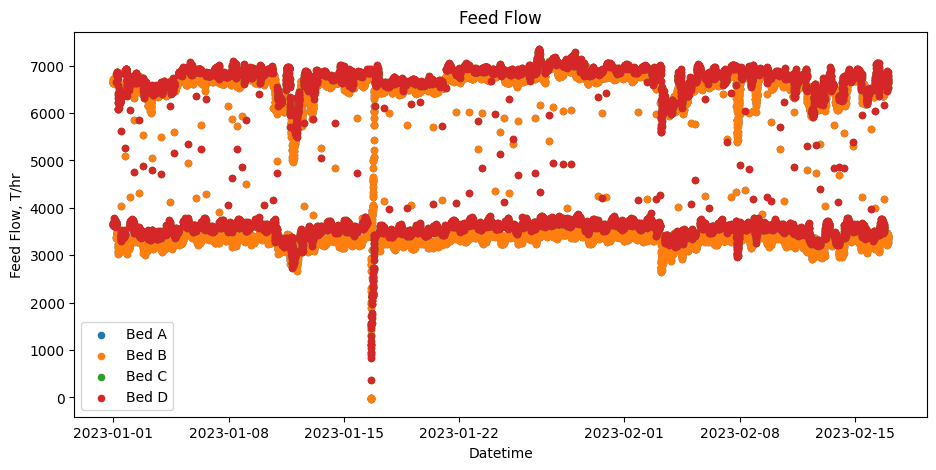

In [35]:
ax = df.plot.scatter('Datetime', 'Feed Flow, Bed A', figsize = (11, 5), color='C0', label='Bed A')
df.plot.scatter('Datetime', 'Feed Flow, Bed B', color='C1', label='Bed B', ax=ax)
df.plot.scatter('Datetime', 'Feed Flow, Bed C', color='C2', label='Bed C', ax=ax)
df.plot.scatter('Datetime', 'Feed Flow, Bed D', color='C3', label='Bed D', ax=ax)
ax.set_ylabel('Feed Flow, T/hr')
ax.set_title('Feed Flow')

Text(0.5, 1.0, 'Inlet Pressure')

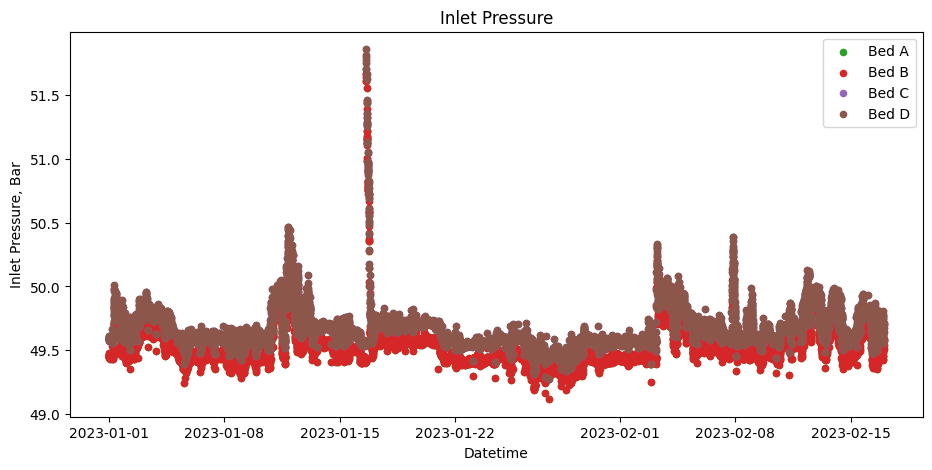

In [37]:
ax1 = df.plot.scatter('Datetime', 'Inlet Pressure, Bed A', figsize = (11, 5), color = 'C2', label='Bed A')
df.plot.scatter('Datetime', 'Inlet Pressure, Bed B', color = 'C3', label='Bed B', ax=ax1)
df.plot.scatter('Datetime', 'Inlet Pressure, Bed C', color = 'C4', label='Bed C', ax=ax1)
df.plot.scatter('Datetime', 'Inlet Pressure, Bed D', color = 'C5', label='Bed D', ax=ax1)
ax1.set_ylabel('Inlet Pressure, Bar')
ax1.set_title('Inlet Pressure')

From the trend, top "line" will be feed flowrate during adsorption, and the bottom "line" will be the regeneration flowrate.

Now let's check inlet pressure

We can see that possible issues 8 January to 22 January 2023 that made prssure increase. And similar problem happened betwen 1 February to 15 February.

Let's check inlet temperature

Let's focus on specific date. The data when we observed high inlet pressure

In [45]:
start_date = '2023-01-16 07:00:00'
end_date = '2023-01-17 00:00:00'
period = (df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)
sub_df = df.loc[period]
sub_df.head()

,Datetime,"Inlet Pressure, Bed A","Feed Flow, Bed A","Inlet Temperature, Bed A","Top Moisture analyser, Bed A","Bottom Moisture analyser, Bed A","Pressure Drop, Bed A","Inlet Pressure, Bed B","Feed Flow, Bed B","Inlet Temperature, Bed B",...,"Feed Flow, Bed D","Inlet Temperature, Bed D","Top Moisture analyser, Bed D","Bottom Moisture analyser, Bed D","Pressure Drop, Bed D",Moisture analyser (common),Temperature common outlet,Regeneration gas flow rate,Regeneration gas temperature,Regeneration pressure
4404,2023-01-16 07:00:00,49.408009,6716.210938,17.787886,-0.475260,0.027481,0.716641,49.408009,6716.210938,17.930462,...,3805.937500,17.926130,-0.144092,0.064229,0.791406,0.003320,180.441406,450.896484,85.932953,41.755859
4405,2023-01-16 07:05:00,49.417191,6732.070312,17.800877,-0.468750,0.027807,0.717412,49.417191,6732.070312,17.900036,...,3693.437500,17.919636,-0.153855,0.064229,0.790410,0.003281,140.471680,449.054688,92.343987,41.776043
4406,2023-01-16 07:10:00,49.403519,6754.921875,17.785334,-0.478516,0.027807,0.720547,49.403519,6754.921875,17.867561,...,3692.760498,17.919750,-0.144092,0.064879,0.791567,0.003262,105.187988,450.445312,97.060226,41.767902
4407,2023-01-16 07:15:00,49.416214,6709.036621,17.774897,-0.458984,0.027807,0.718008,49.416214,6709.036621,17.862341,...,3656.614502,17.887159,-0.152228,0.064879,0.790254,0.003281,86.054199,450.007812,100.154381,41.789062
4408,2023-01-16 07:20:00,49.413090,6745.546875,17.730595,-0.465495,0.027807,0.717910,49.413090,6745.546875,17.862341,...,3748.776123,17.893541,-0.145719,0.064879,0.790459,0.003262,75.267090,451.210938,102.012558,41.796875


<Axes: xlabel='Date', ylabel='Temperature, oC'>

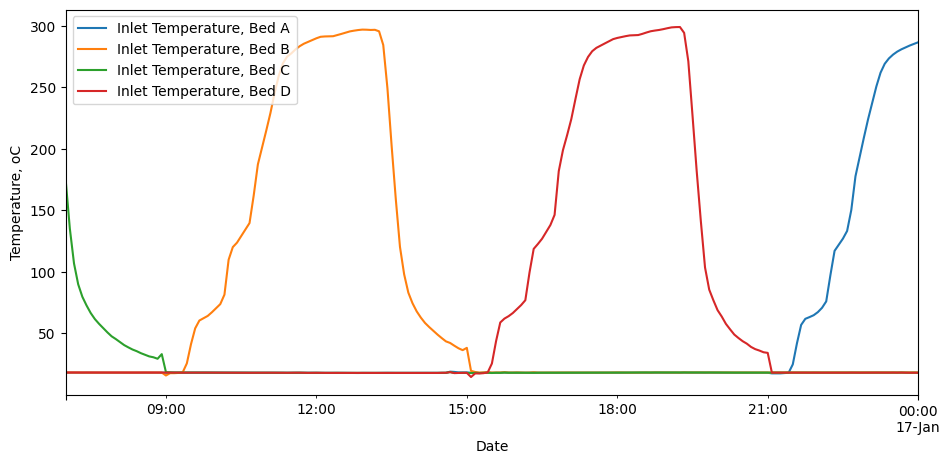

In [46]:
sub_df.plot('Datetime', ['Inlet Temperature, Bed A', 'Inlet Temperature, Bed B', 'Inlet Temperature, Bed C', 'Inlet Temperature, Bed D'],
            xlabel = 'Date',
            ylabel = 'Temperature, oC',
            figsize=(11, 5),
           )

So from bed temperature stand ploint, no issue in that period.

Let's see moisture at specific date during high inlet pressure

<Axes: xlabel='Date', ylabel='Top Moisture analyser, ppmv'>

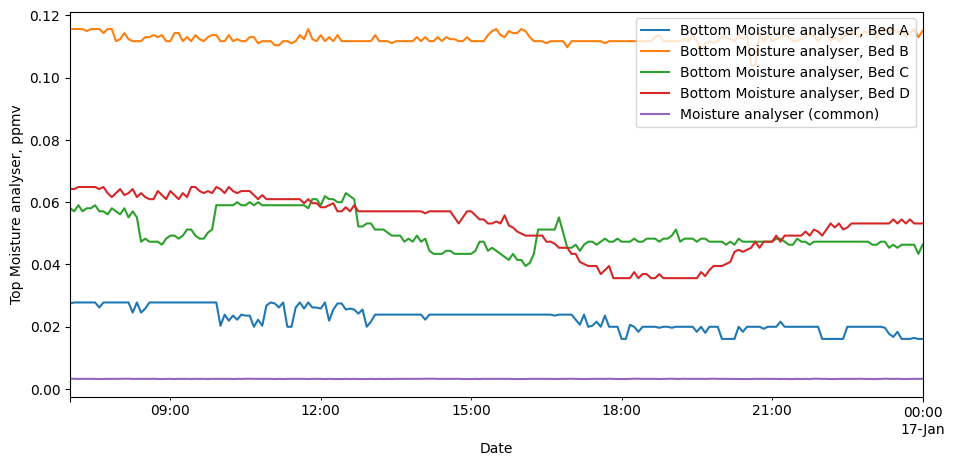

In [49]:
sub_df.plot('Datetime', ['Bottom Moisture analyser, Bed A', 'Bottom Moisture analyser, Bed B', 'Bottom Moisture analyser, Bed C', 'Bottom Moisture analyser, Bed D', 'Moisture analyser (common)'],
            xlabel = 'Date',
            ylabel = 'Moisture  at analyser, ppmv',
            figsize=(11, 5),
           )

<Axes: xlabel='Date', ylabel='Inlet Pressure, Bar'>

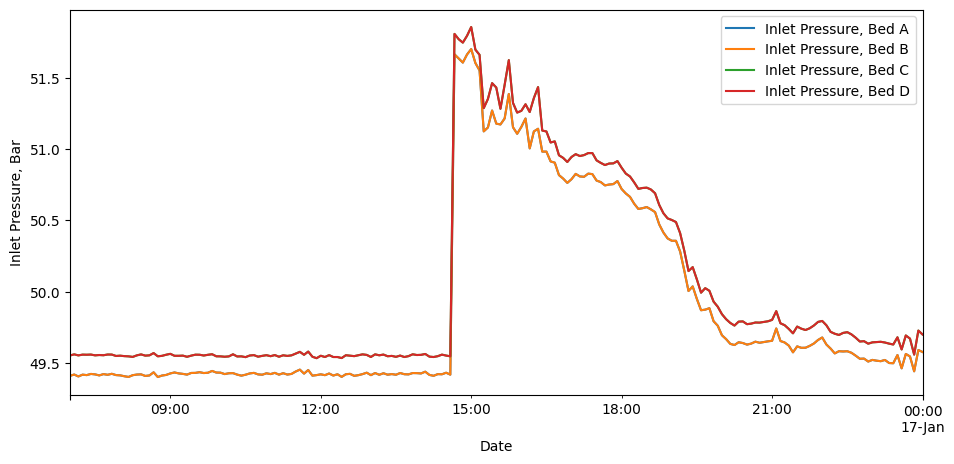

In [52]:
sub_df.plot('Datetime', ['Inlet Pressure, Bed A', 'Inlet Pressure, Bed B', 'Inlet Pressure, Bed C', 'Inlet Pressure, Bed D'],
            xlabel = 'Date',
            ylabel = 'Inlet Pressure, Bar',
            figsize=(11, 5),
           )

<Axes: xlabel='Date', ylabel='Pressure Drop, Bar'>

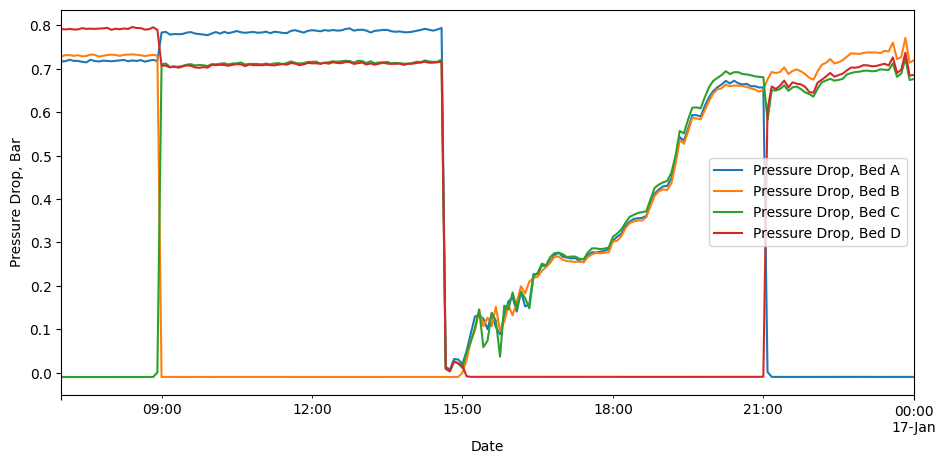

In [51]:
sub_df.plot('Datetime', ['Pressure Drop, Bed A', 'Pressure Drop, Bed B', 'Pressure Drop, Bed C', 'Pressure Drop, Bed D'],
            xlabel = 'Date',
            ylabel = 'Pressure Drop, Bar',
            figsize=(11, 5),
           )